***
<pre>                                                 <i> Linear Regression <i></pre>
***
</div>
    <img src="INSEA_logo.png"  style="height: 80px;: 20px;">
</div>

<div style="background-color: green">
<h1 align="center"> Multiple Linear Regression  </h1>
</div>

<pre align='left'>  18/04/2025                                                                                         <i> Author: DAOUDI Adam </i></pre>


____________________________________________________________________________________________________________________________________________________________

#### objectifs :
- Read the Data

- Exploratory Data Analysis

- Encoding of the Categorical Variables

- Regression with statsmodel

- sklearn Regression Pipelines

### Importing Libreries

In [217]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder

### Load Datset

In [218]:
StudentsPerformance = pd.read_csv("StudentsPerformance[1].csv")

StudentsPerformance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Data Vis

In [219]:
print(f'-StudentsPerformance shape is {StudentsPerformance.shape}\n')
print(f'- The data set columns are {StudentsPerformance.dtypes}\n')
print(f'- The datasest has {StudentsPerformance.isnull().sum().max()} null values \n')
print(f'- The datset has {StudentsPerformance.duplicated().sum()} duplicated rows\n')

-StudentsPerformance shape is (1000, 8)

- The data set columns are gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

- The datasest has 0 null values 

- The datset has 0 duplicated rows



In [220]:
StudentsPerformance.dtypes


gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [221]:
StudentsPerformance.describe

<bound method NDFrame.describe of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none  

## Data Analysis

### categorical Variables

In [222]:
cat_cols = [cols for cols in StudentsPerformance.columns if StudentsPerformance[cols].dtype == 'object']
print(f'Categorical columns in the dataframe are: {cat_cols}', end='')
print('\n')
num_cols = [cols for cols in StudentsPerformance.columns if StudentsPerformance[cols].dtype != 'object']
print(f'numerical columns in the dataframe are: {num_cols}', end='')


Categorical columns in the dataframe are: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

numerical columns in the dataframe are: ['math score', 'reading score', 'writing score']

Text(0.5, 1.0, 'Parental level of education VS Ethnicity')

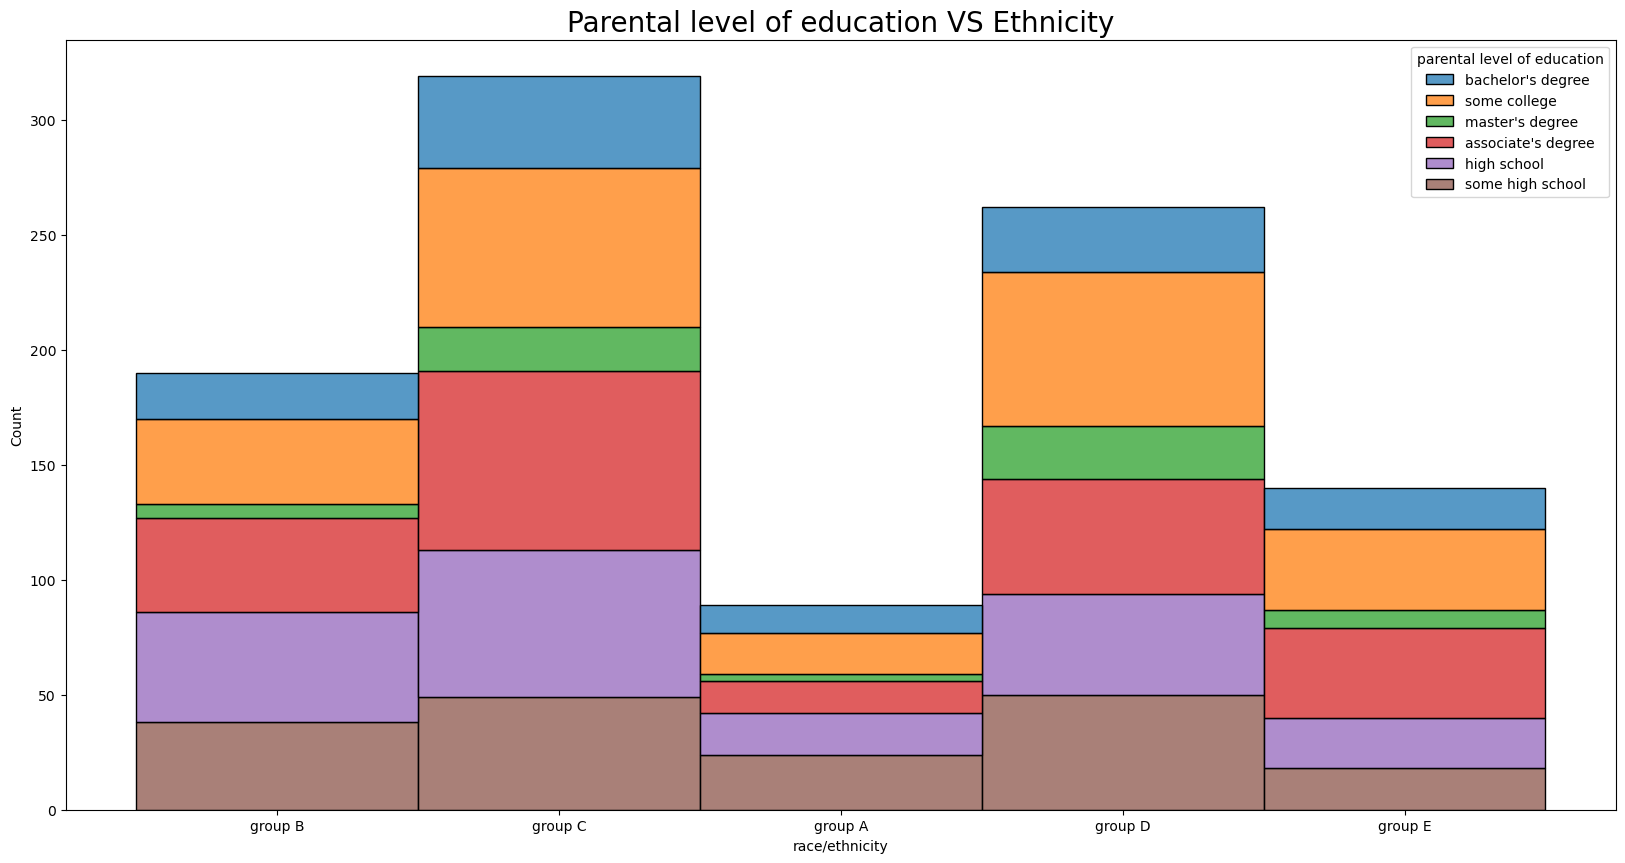

In [223]:
plt.figure(figsize=(20, 10))
sns.histplot(data=StudentsPerformance, x='race/ethnicity', hue='parental level of education', multiple='stack')
plt.title('Parental level of education VS Ethnicity', size=20)

### Numerical Values

In [224]:
num_cols

['math score', 'reading score', 'writing score']

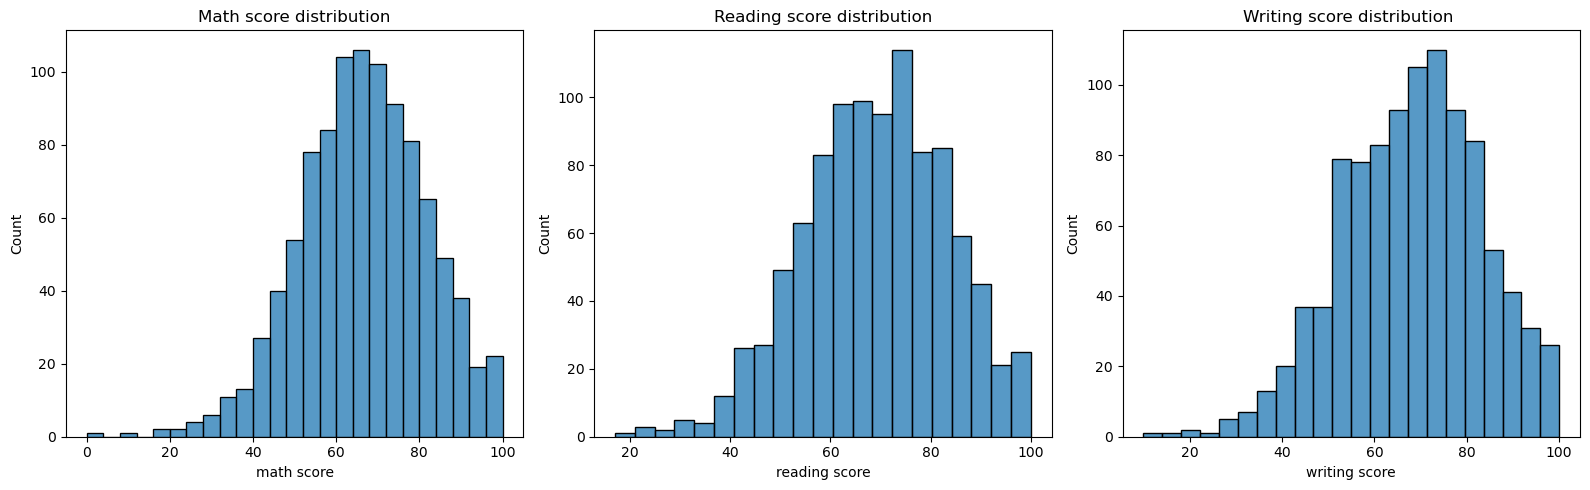

In [225]:
fig , (ax1, ax2, ax3)= plt.subplots(ncols=3, figsize=(16,5))

ax1=sns.histplot(data=StudentsPerformance, x='math score', ax=ax1)
ax1.set_title('Math score distribution', size=12)

ax2=sns.histplot(data=StudentsPerformance, x='reading score', ax=ax2)
ax2.set_title('Reading score distribution', size=12)

ax3= sns.histplot(data=StudentsPerformance, x='writing score', ax=ax3)
ax3.set_title('Writing score distribution ', size=12)


plt.tight_layout()

In [226]:
for col in num_cols:
    print(f'---------------------{col}-------------------------')
    print(f'Skewness of {col}:{StudentsPerformance[col].skew()} ')
    print(f'Kurtosis of {col}: {StudentsPerformance[col].kurtosis()}\n')
    print('\n')

---------------------math score-------------------------
Skewness of math score:-0.27893514909431694 
Kurtosis of math score: 0.27496405752108455



---------------------reading score-------------------------
Skewness of reading score:-0.25910451810923063 
Kurtosis of reading score: -0.0682654585647704



---------------------writing score-------------------------
Skewness of writing score:-0.28944397150761897 
Kurtosis of writing score: -0.03336461500693577





In [227]:
for col in num_cols:
    print(f'mean of {col}: {StudentsPerformance[col].mean()}')
    print(f'Median of {col}: {StudentsPerformance[col].median()}')
    print()

mean of math score: 66.089
Median of math score: 66.0

mean of reading score: 69.169
Median of reading score: 70.0

mean of writing score: 68.054
Median of writing score: 69.0



## Outliers

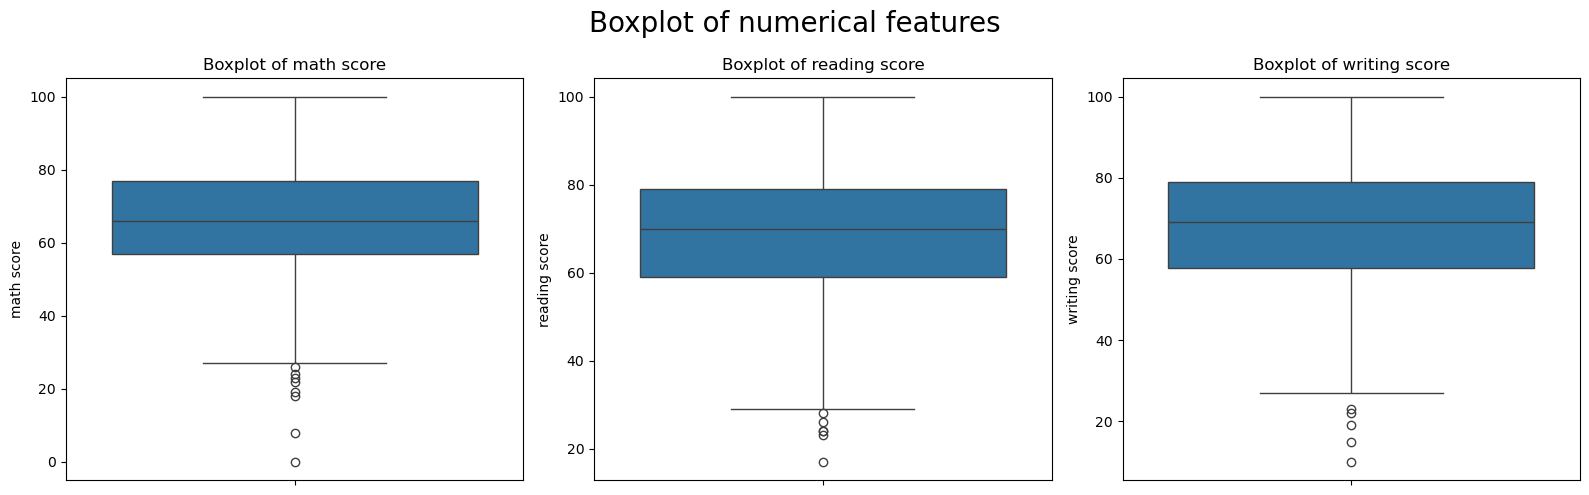

In [228]:
def plot_boxplot(data, features):
    fig , (ax1, ax2, ax3)=plt.subplots(ncols=3, figsize=(16,5))

    ax1= sns.boxplot(data[features[0]], ax=ax1)
    ax1.set_title(f'Boxplot of {features[0]}', size=12)
    ax2= sns.boxplot(data[features[1]], ax=ax2)
    ax3= sns.boxplot(data[features[2]], ax=ax3)
    ax2.set_title(f'Boxplot of {features[1]}', size=12)
    ax3.set_title(f'Boxplot of {features[2]}', size=12)

    plt.suptitle('Boxplot of numerical features', size=20)
    plt.tight_layout()
    plt.show()


plot_boxplot(StudentsPerformance, num_cols)





In [229]:
outliers_precentage= []
print('Outliers percentage in the columns: ')
print()

def outliers_percentage_search(data2, features):
    for i, j in data2[features].items():
        if data2[i].dtype != 'O':
            q1 = j.quantile(0.25)
            q3 = j.quantile(0.75)
            irq= q3 - q1
            j_col= j[(j <= q1 - 1.5*irq) | (j>= q3 + 1.5*irq)]
            perc=(np.shape(j_col)[0] *100.00/ np.shape(data2)[0])
            out_tuple= (i,int(perc)) 
            outliers_precentage.append(out_tuple)
            print("Column %s outliers = %.1f%%" % (i,perc))


outliers_percentage_search(StudentsPerformance, num_cols)

            

Outliers percentage in the columns: 

Column math score outliers = 1.0%
Column reading score outliers = 0.8%
Column writing score outliers = 0.5%


### Encoding of the Categorical Variables



##### Encoding gender, lunch and the test preparation course

In [230]:
data = StudentsPerformance.copy()

list_predictors = data.columns.tolist()
list_predictors.remove('math score')
list_predictors.remove('reading score')
list_predictors.remove('writing score')

lab_enc= LabelEncoder()
lab_enc_cols= ['gender','lunch', 'test preparation course']

X_train, X_test, y_train, y_test =train_test_split(data[list_predictors], data['math score'], test_size=0.2, random_state=42)


for col in lab_enc_cols:
    X_train[col]= lab_enc.fit_transform(X_train[col])
    X_test[col]= lab_enc.transform(X_test[col])

X_test.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
521,0,group C,associate's degree,1,1
737,0,group B,some college,0,0
740,1,group D,bachelor's degree,1,1
660,1,group C,some college,0,1
411,1,group E,some college,1,0


#### Encoding race/ethnicity and parental level of education 